In [136]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [137]:
# load the sample dataset
df_sample = pd.read_csv("data_output/df_sample.csv")
#visualize df_sample
df_sample.head()

,census_aland,census_aland_sqmi,census_awater,census_awater_sqmi,census_diversity_score,census_educational_score,census_geoid,census_intptlat,census_intptlong,census_median_age,census_median_household_income,census_population,top_category
0,53731552,20.746,2717798,1.049,0.233184,5.121376,1545,42.284767,-71.714228,40.5,94273.0,35963,Socializing
1,118316345,45.682,972969,0.376,0.013807,3.839525,65075,38.237326,-92.250624,37.9,64643.0,1014,Socializing
2,303225857,117.076,993181,0.383,0.132607,4.597581,99224,47.652359,-117.526002,37.0,58789.0,21379,Socializing
3,86544801,33.415,740836,0.286,0.097513,4.536801,32128,29.100739,-81.071829,51.5,64367.0,17731,Socializing
4,45026795,17.385,236022,0.091,0.202166,5.326425,36013,32.284669,-85.985235,40.5,127567.0,554,Others


In [138]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 13 columns):
census_aland                      954 non-null int64
census_aland_sqmi                 954 non-null float64
census_awater                     954 non-null int64
census_awater_sqmi                954 non-null float64
census_diversity_score            954 non-null float64
census_educational_score          954 non-null float64
census_geoid                      954 non-null int64
census_intptlat                   954 non-null float64
census_intptlong                  954 non-null float64
census_median_age                 954 non-null float64
census_median_household_income    954 non-null float64
census_population                 954 non-null int64
top_category                      954 non-null object
dtypes: float64(8), int64(4), object(1)
memory usage: 97.0+ KB


### Association between socialization and household income

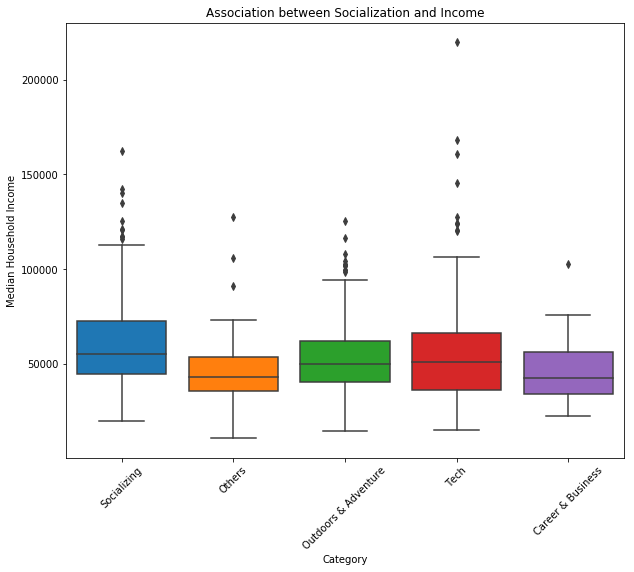

In [164]:
plt.figure(figsize=(10,8))
sns.boxplot('top_category','census_median_household_income',data=df_sample,saturation=50)
plt.title("Association between Socialization and Income")
plt.ylabel("Median Household Income")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.savefig('data_images/plot3a_income.png',bbox_inches='tight')
plt.show();

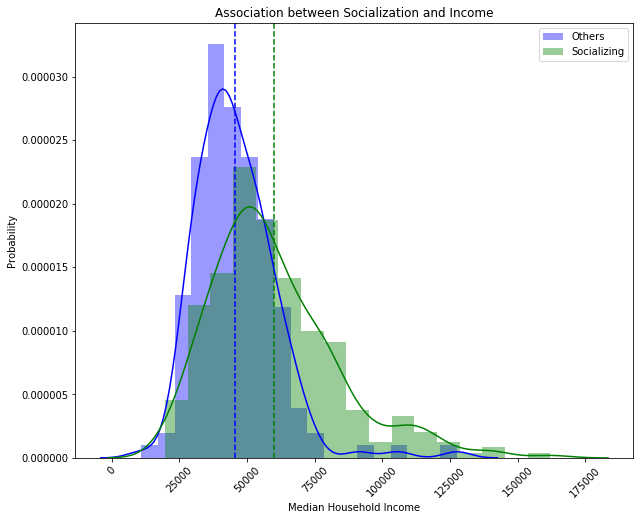

In [165]:
plt.figure(figsize=(10,8))
sns.distplot(df_sample[df_sample['top_category']=='Others']['census_median_household_income'],label='Others',color='blue')
sns.distplot(df_sample[df_sample['top_category']=='Socializing']['census_median_household_income'],label='Socializing',color='green')

v1 = df_sample[df_sample['top_category']=='Others']['census_median_household_income'].mean()
v2 = df_sample[df_sample['top_category']=='Socializing']['census_median_household_income'].mean()
plt.vlines(v1,0,1,colors='blue',linestyles='dashed')
plt.vlines(v2,0,1,colors='green',linestyles='dashed')

plt.title("Association between Socialization and Income")
plt.ylabel("Probability")
plt.xlabel("Median Household Income")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('data_images/plot3b_income.png',bbox_inches='tight')
plt.show();

In [36]:
# Extract individual groups
temp = df_sample[['top_category','census_median_household_income']]
temp_groups = temp.groupby("top_category").groups

group1 = temp.iloc[temp_groups['Career & Business'].values,:]['census_median_household_income'].values
group2 = temp.iloc[temp_groups['Others'].values,:]['census_median_household_income'].values
group3 = temp.iloc[temp_groups['Outdoors & Adventure'].values,:]['census_median_household_income'].values
group4 = temp.iloc[temp_groups['Socializing'].values,:]['census_median_household_income'].values
group5 = temp.iloc[temp_groups['Tech'].values,:]['census_median_household_income'].values

In [37]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=14.493597689267284, pvalue=1.7086072670695699e-11)

### Association between socialization and median_age

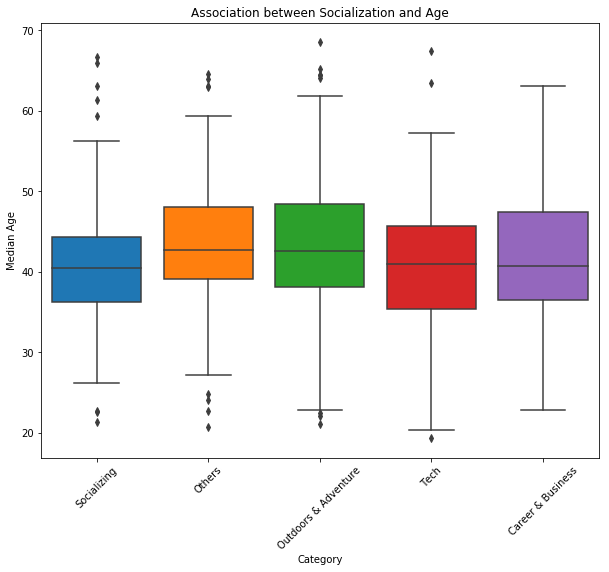

In [166]:
plt.figure(figsize=(10,8))
sns.boxplot('top_category','census_median_age',data=df_sample,saturation=50)
plt.title("Association between Socialization and Age")
plt.ylabel("Median Age")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.savefig('data_images/plot4a_age.png',bbox_inches='tight')
plt.show();

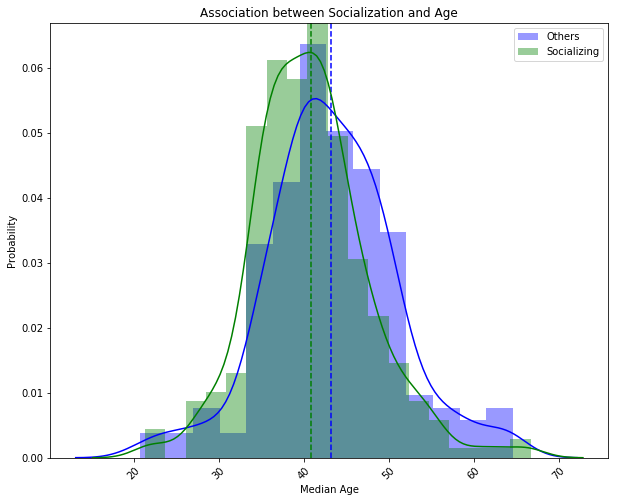

In [167]:
plt.figure(figsize=(10,8))
sns.distplot(df_sample[df_sample['top_category']=='Others']['census_median_age'],label='Others',color='blue')
sns.distplot(df_sample[df_sample['top_category']=='Socializing']['census_median_age'],label='Socializing',color='green')


v1 = df_sample[df_sample['top_category']=='Others']['census_median_age'].mean()
v2 = df_sample[df_sample['top_category']=='Socializing']['census_median_age'].mean()
plt.vlines(v1,0,1,colors='blue',linestyles='dashed')
plt.vlines(v2,0,1,colors='green',linestyles='dashed')


plt.title("Association between Socialization and Age")
plt.ylabel("Probability")
plt.xlabel("Median Age")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('data_images/plot4b_age.png',bbox_inches='tight')
plt.show();

In [40]:
# Extract individual groups
temp = df_sample[['top_category','census_median_age']]
temp_groups = temp.groupby("top_category").groups
group1 = temp.iloc[temp_groups['Career & Business'].values,:]['census_median_age'].values
group2 = temp.iloc[temp_groups['Others'].values,:]['census_median_age'].values
group3 = temp.iloc[temp_groups['Outdoors & Adventure'].values,:]['census_median_age'].values
group4 = temp.iloc[temp_groups['Socializing'].values,:]['census_median_age'].values
group5 = temp.iloc[temp_groups['Tech'].values,:]['census_median_age'].values

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=4.9187653583123536, pvalue=0.00062827359396176242)

### Association between socialization and education

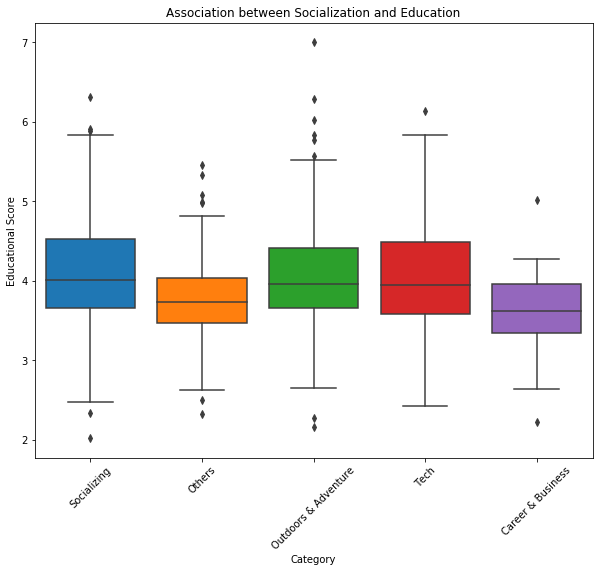

In [168]:
plt.figure(figsize=(10,8))
sns.boxplot('top_category','census_educational_score',data=df_sample,saturation=50)
plt.title("Association between Socialization and Education")
plt.ylabel("Educational Score")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.savefig('data_images/plot5a_education.png',bbox_inches='tight')
plt.show();

In [41]:
# Extract individual groups
temp = df_sample[['top_category','census_educational_score']]
temp_groups = temp.groupby("top_category").groups
group1 = temp.iloc[temp_groups['Career & Business'].values,:]['census_educational_score'].values
group2 = temp.iloc[temp_groups['Others'].values,:]['census_educational_score'].values
group3 = temp.iloc[temp_groups['Outdoors & Adventure'].values,:]['census_educational_score'].values
group4 = temp.iloc[temp_groups['Socializing'].values,:]['census_educational_score'].values
group5 = temp.iloc[temp_groups['Tech'].values,:]['census_educational_score'].values

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=14.405136810723056, pvalue=2.0074743667710901e-11)

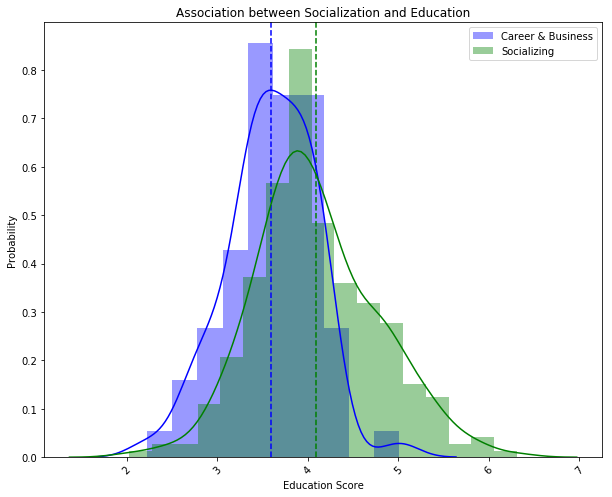

In [169]:
plt.figure(figsize=(10,8))
sns.distplot(df_sample[df_sample['top_category']=='Career & Business']['census_educational_score'],label='Career & Business',color='blue')
sns.distplot(df_sample[df_sample['top_category']=='Socializing']['census_educational_score'],label='Socializing',color='green')

v1 = df_sample[df_sample['top_category']=='Career & Business']['census_educational_score'].mean()
v2 = df_sample[df_sample['top_category']=='Socializing']['census_educational_score'].mean()
plt.vlines(v1,0,1,colors='blue',linestyles='dashed')
plt.vlines(v2,0,1,colors='green',linestyles='dashed')

plt.title("Association between Socialization and Education")
plt.ylabel("Probability")
plt.xlabel("Education Score")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('data_images/plot5b_education.png',bbox_inches='tight')
plt.show();

### Association between socialization and diversity

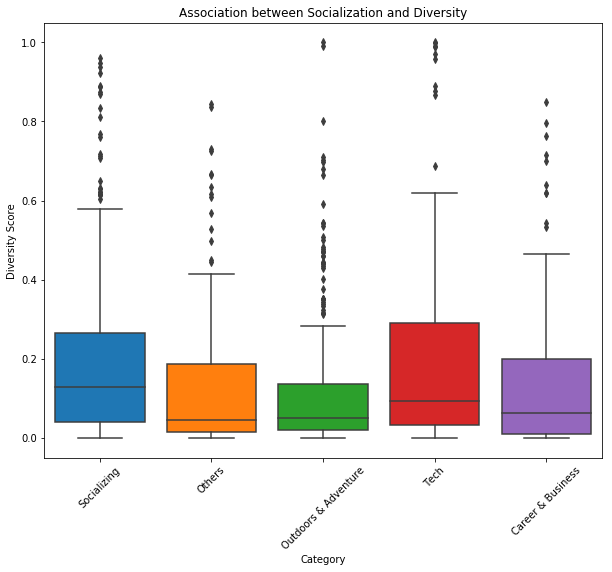

In [170]:
plt.figure(figsize=(10,8))
sns.boxplot('top_category','census_diversity_score',data=df_sample,saturation=50)
plt.title("Association between Socialization and Diversity")
plt.ylabel("Diversity Score")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.savefig('data_images/plot6a_diversity.png',bbox_inches='tight')
plt.show();

In [42]:
# Extract individual groups
temp = df_sample[['top_category','census_diversity_score']]
temp_groups = temp.groupby("top_category").groups
group1 = temp.iloc[temp_groups['Career & Business'].values,:]['census_diversity_score'].values
group2 = temp.iloc[temp_groups['Others'].values,:]['census_diversity_score'].values
group3 = temp.iloc[temp_groups['Outdoors & Adventure'].values,:]['census_diversity_score'].values
group4 = temp.iloc[temp_groups['Socializing'].values,:]['census_diversity_score'].values
group5 = temp.iloc[temp_groups['Tech'].values,:]['census_diversity_score'].values

# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=7.5339582862377039, pvalue=5.6374262796586212e-06)

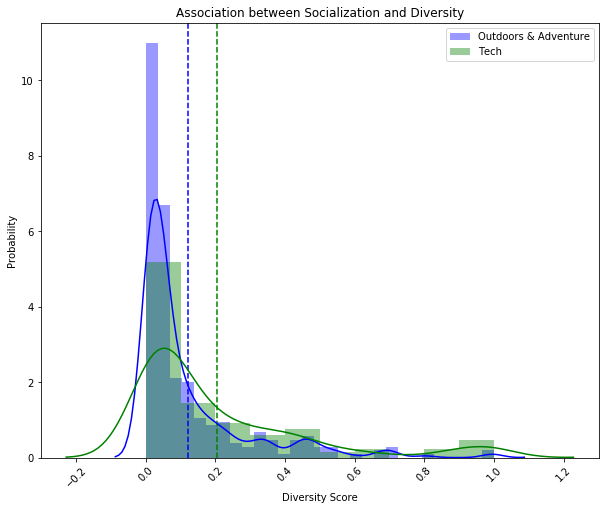

In [171]:
plt.figure(figsize=(10,8))
sns.distplot(df_sample[df_sample['top_category']=='Outdoors & Adventure']['census_diversity_score'],label='Outdoors & Adventure',color='blue')
sns.distplot(df_sample[df_sample['top_category']=='Tech']['census_diversity_score'],label='Tech',color='green')

v1 = df_sample[df_sample['top_category']=='Outdoors & Adventure']['census_diversity_score'].mean()
v2 = df_sample[df_sample['top_category']=='Tech']['census_diversity_score'].mean()
plt.vlines(v1,0,20,colors='blue',linestyles='dashed')
plt.vlines(v2,0,20,colors='green',linestyles='dashed')


plt.title("Association between Socialization and Diversity")
plt.ylabel("Probability")
plt.xlabel("Diversity Score")
plt.xticks(rotation=45)
plt.legend()
plt.savefig('data_images/plot6b_diversity.png',bbox_inches='tight')
plt.show();